# Customer Churn Prediction

Problem Statement:
Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage data.

# Metadata

customerID : Customer ID

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

In [1]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting working directory
os.chdir('C:/Users/sagar/Documents/Assignments/Data Mining 2/Project')

#reading input file
customer_churn = pd.read_csv('Telco-Customer-Churn.csv')

#checking data dimensions of customer churn dataset
customer_churn.shape

(7043, 21)

In [3]:
#describing the columns in the customer churn data with various statistics
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#return top 5 rows to have an overview
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#check the data types
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
def changedatatypes(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changedatatypes(customer_churn)

In [7]:
#change SeniorCitizen from integer to boolean
customer_churn['SeniorCitizen']=customer_churn['SeniorCitizen'].astype(bool)

In [8]:
#change TotalCharges from object to Numeric
customer_churn['TotalCharges']=pd.to_numeric(customer_churn['TotalCharges'],errors='coerce')

In [9]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,False,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,False,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,False,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

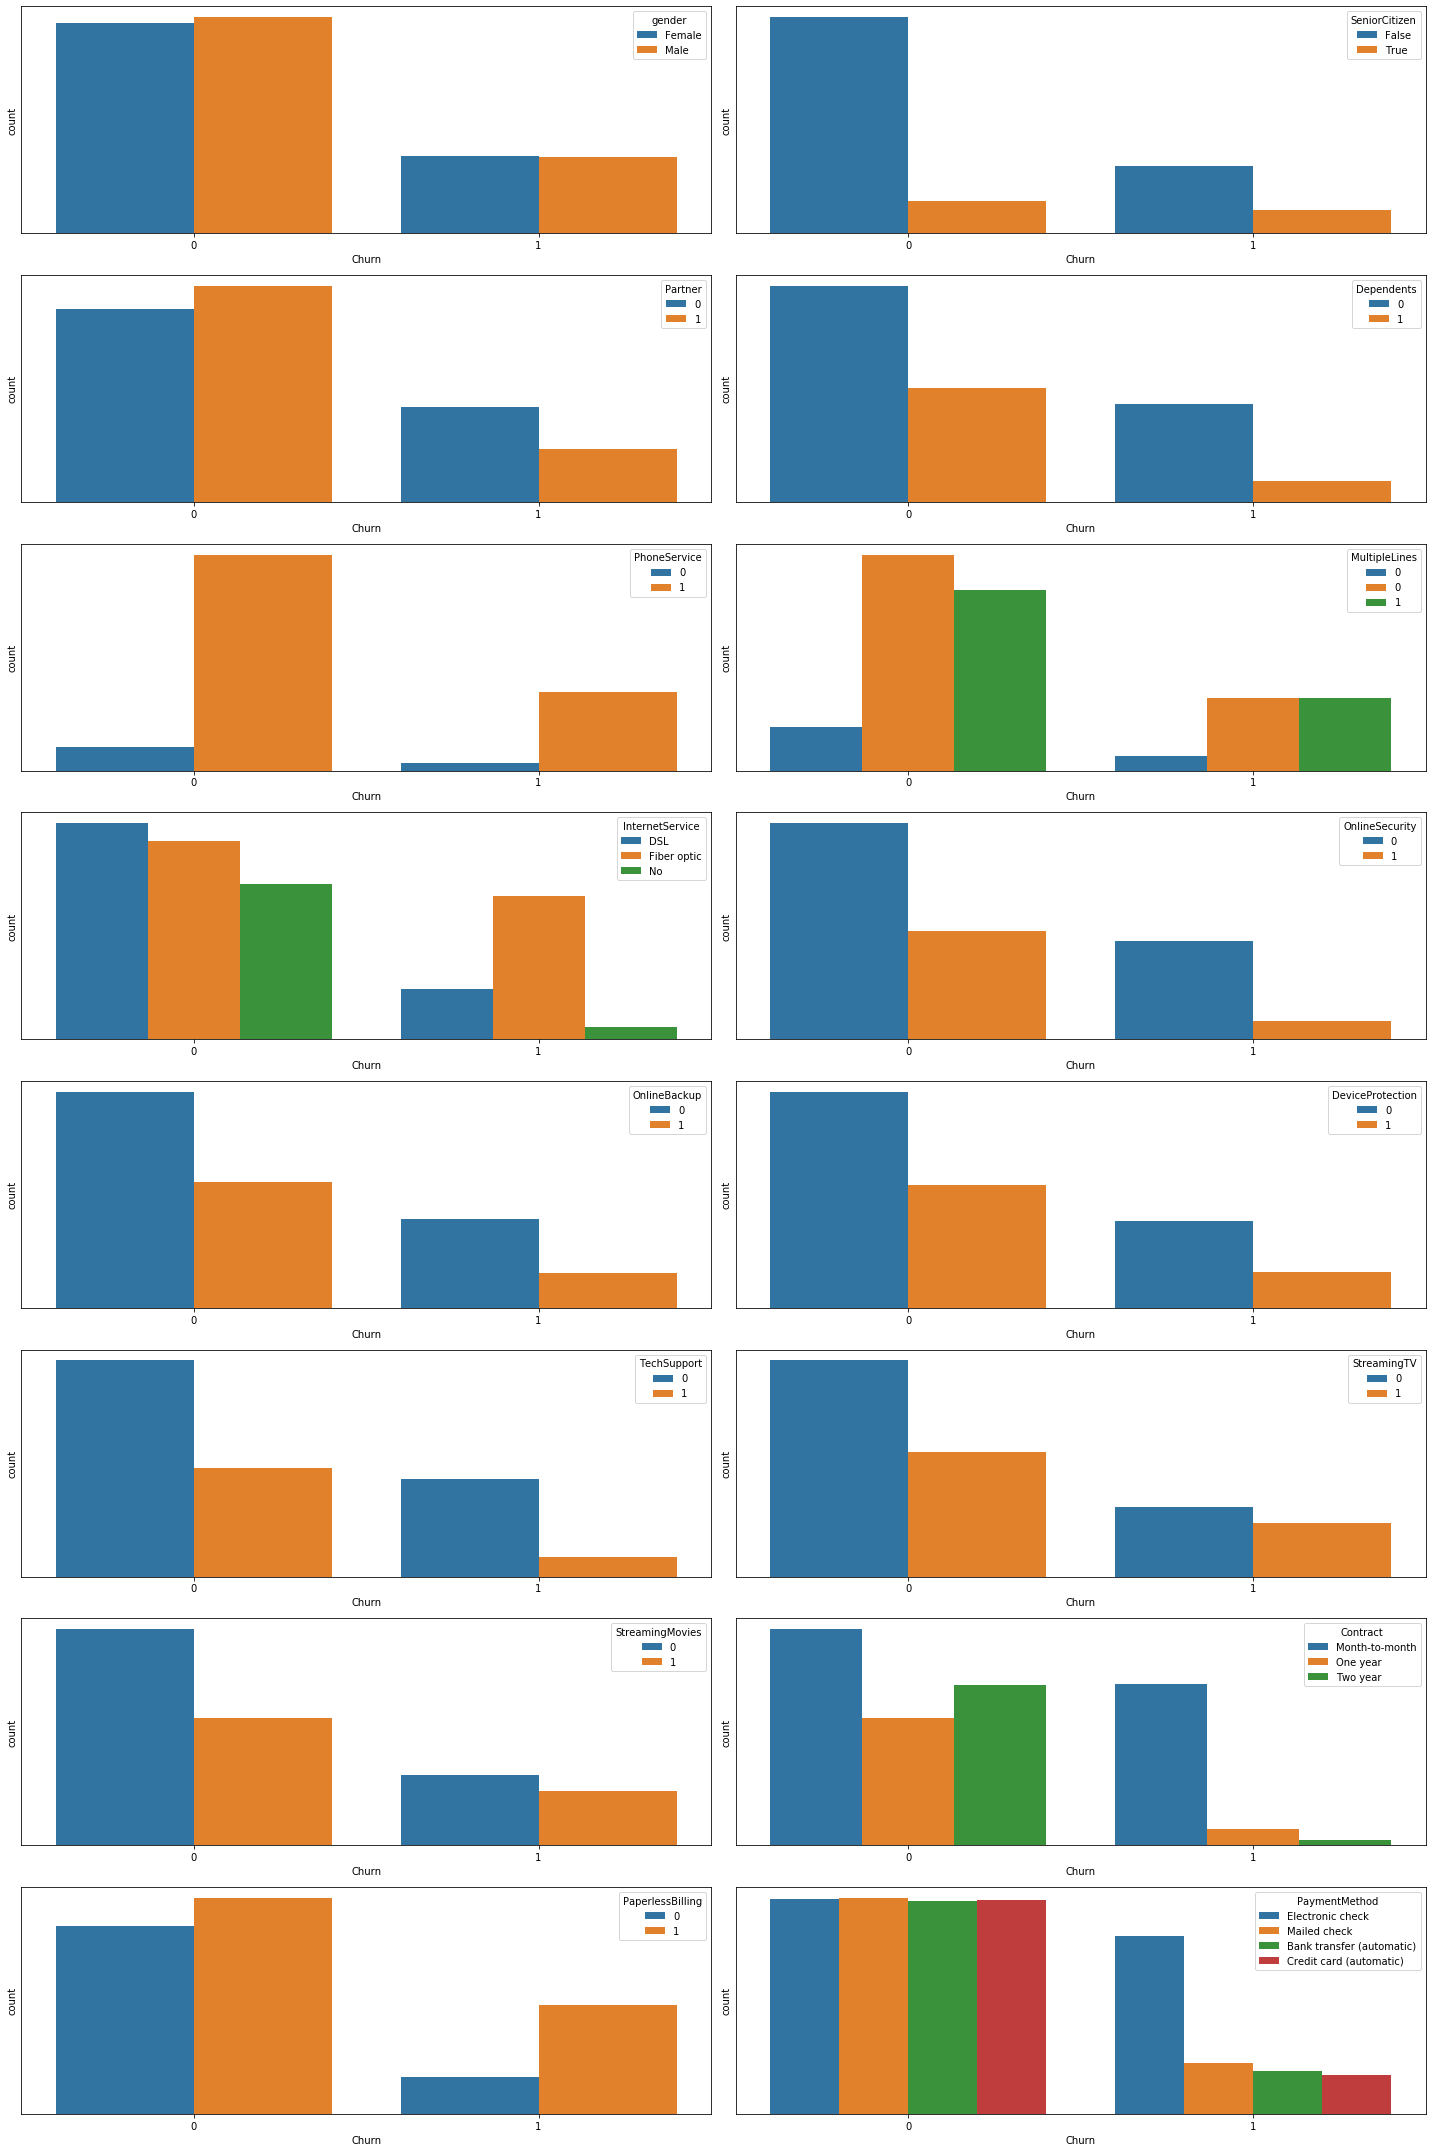

In [11]:
#data exploration for customer churn w.r.t other features
f, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 30))

sns.countplot(customer_churn["Churn"],hue = customer_churn["gender"],ax = axes[0,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["SeniorCitizen"],ax = axes[0,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["Partner"],ax = axes[1,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["Dependents"],ax = axes[1,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["PhoneService"],ax = axes[2,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["MultipleLines"],ax = axes[2,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["InternetService"],ax = axes[3,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["OnlineSecurity"],ax = axes[3,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["OnlineBackup"],ax = axes[4,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["DeviceProtection"],ax = axes[4,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["TechSupport"],ax = axes[5,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["StreamingTV"],ax = axes[5,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["StreamingMovies"],ax = axes[6,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["Contract"],ax = axes[6,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["PaperlessBilling"],ax = axes[7,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["PaymentMethod"],ax = axes[7,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

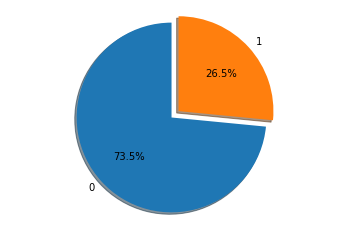

In [12]:
#pie chart for churn distribution
plt.pie(customer_churn["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=customer_churn["Churn"].unique())
plt.axis('equal') ;

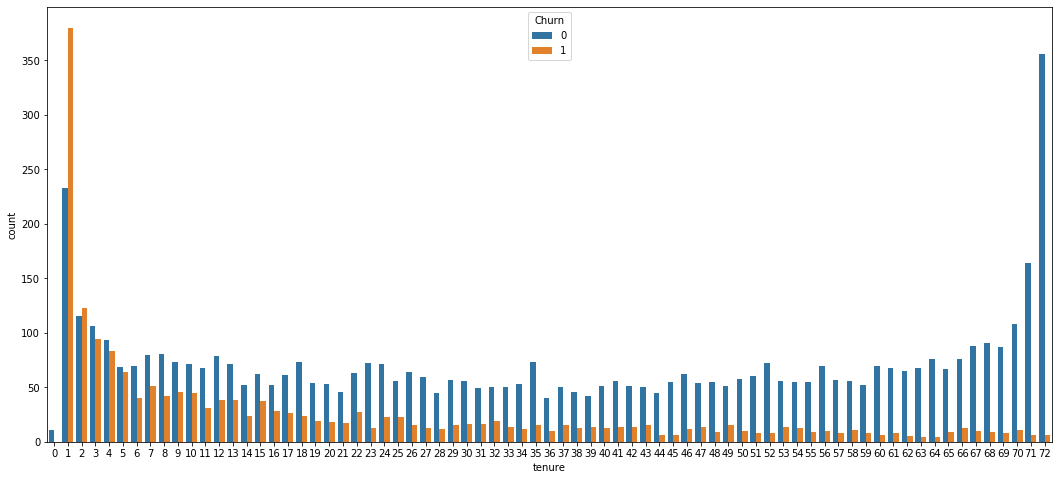

In [13]:
#customer churn with respect to tenure
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(customer_churn["tenure"],hue = customer_churn["Churn"]);

We will now convert categorical values with datatype as object and convert them into datatype category

In [14]:
#to obtain unique categories in the required variables
print("Payment methods: ",customer_churn.PaymentMethod.unique())
print("Contract types: ",customer_churn.Contract.unique())
print("Gender: ",customer_churn.gender.unique())
print("Senior Citizen: ",customer_churn.SeniorCitizen.unique())
print("Internet Service Types: ",customer_churn.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [15]:
#changing the datatype to category
customer_churn['gender']=customer_churn['gender'].astype('category')
customer_churn['PaymentMethod']=customer_churn['PaymentMethod'].astype('category')
customer_churn['Contract']=customer_churn['Contract'].astype('category')
customer_churn['SeniorCitizen']=customer_churn['SeniorCitizen'].astype('category')
customer_churn['InternetService']=customer_churn['InternetService'].astype('category')
customer_churn.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [16]:
#using the pandas built-in method get_dummies to give the values and prefix to the categorical fields
#dfPaymentDummies = pd.get_dummies(customer_churn['PaymentMethod'], prefix = 'payment')
#dfContractDummies = pd.get_dummies(customer_churn['Contract'], prefix = 'contract')
#dfGenderDummies = pd.get_dummies(customer_churn['gender'], prefix = 'gender')
#dfSeniorCitizenDummies = pd.get_dummies(customer_churn['SeniorCitizen'], prefix = 'SC')
#dfInternetServiceDummies = pd.get_dummies(customer_churn['InternetService'], prefix = 'IS')

In [17]:
#dropping the categorical columns
#customer_churn.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

#merging the columns into the main dataset customer_churn
#customer_churn = pd.concat([customer_churn, dfPaymentDummies], axis=1)
#customer_churn = pd.concat([customer_churn, dfContractDummies], axis=1)
#customer_churn = pd.concat([customer_churn, dfGenderDummies], axis=1)
#customer_churn = pd.concat([customer_churn, dfSeniorCitizenDummies], axis=1)
#customer_churn = pd.concat([customer_churn, dfInternetServiceDummies], axis=1)
#customer_churn.head()

In [18]:
#renaming all columns in the dataset
#customer_churn.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
 #      'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 #      'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
 #      'MonthlyCharges', 'TotalCharges', 'Churn',
 #      'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
 #      'payment_Electronic_check', 'payment_Mailed_check',
 #      'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
 #      'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
 #      'IS_Fiber_optic', 'IS_No']

In [19]:
#converting all columns into numeric datatype
#numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
 #      'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 #      'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
 #      'MonthlyCharges', 'TotalCharges', 'Churn',
 #      'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
 #      'payment_Electronic_check', 'payment_Mailed_check',
 #      'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
 #      'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
 #      'IS_Fiber_optic', 'IS_No'])
#
#for columnName in numericColumns:
#    customer_churn[columnName]=pd.to_numeric(customer_churn[columnName],errors='coerce')
#customer_churn.dtypes

In [20]:
#check for missing values
customer_churn_missing = customer_churn.isnull().sum()
pctg_missing_values = customer_churn_missing/len(customer_churn)
pctg_missing_values.sort_values(ascending=False)

TotalCharges        0.001562
Churn               0.000000
OnlineSecurity      0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
customerID          0.000000
dtype: float64

In [21]:
#dropping missing columns
customer_churn = customer_churn.dropna() 

In [22]:
#count the number of duplicates
customer_churn.duplicated().sum()

0

In [23]:
# remove duplicates
customer_churn = customer_churn[~customer_churn.duplicated()] 

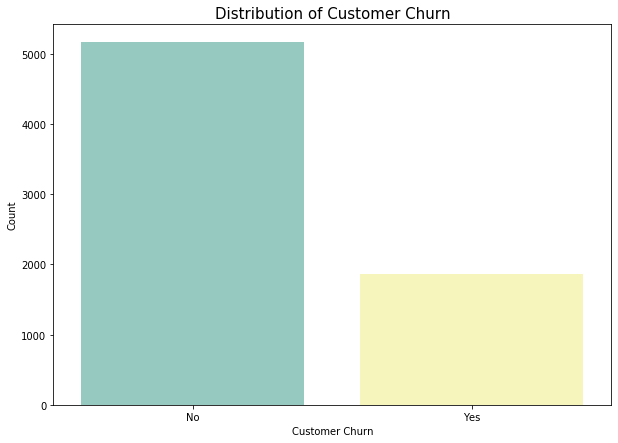

In [24]:
#distribution of customer churn
fig = plt.figure(figsize = (10,7))
ax=sns.countplot(x='Churn',palette="Set3", data=customer_churn)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
plt.title("Distribution of Customer Churn", fontsize=15)
plt.show()

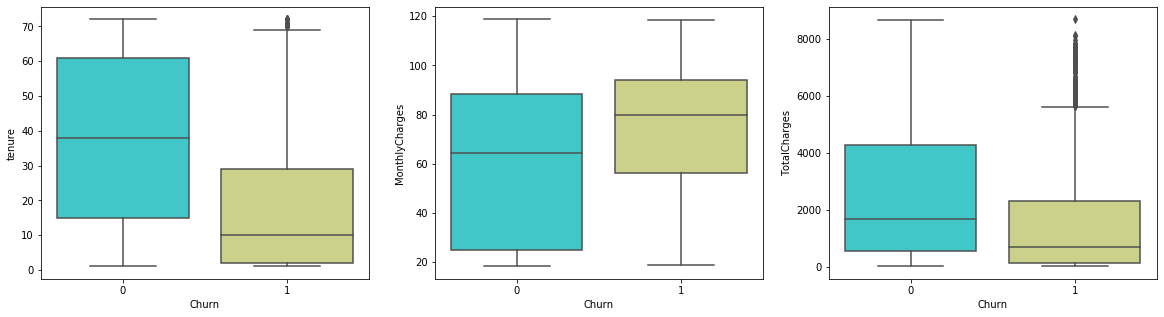

In [25]:
#plotting churn against numeric variables
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=customer_churn,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=customer_churn,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=customer_churn,palette='rainbow',ax = axes[2])

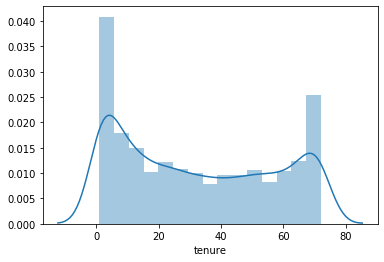

In [26]:
#distribution with kernel density estimation
sns.distplot(customer_churn.tenure);

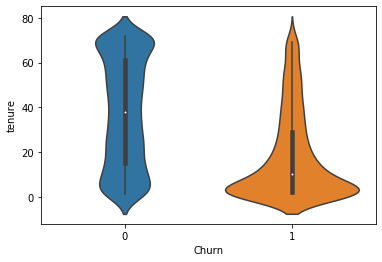

In [27]:
sns.violinplot(x="Churn", y="tenure", data=customer_churn);

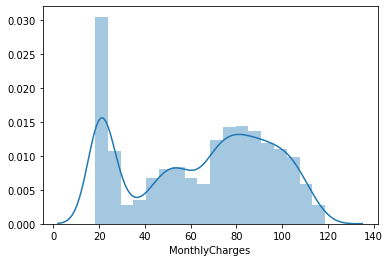

In [28]:
sns.distplot(customer_churn.MonthlyCharges);

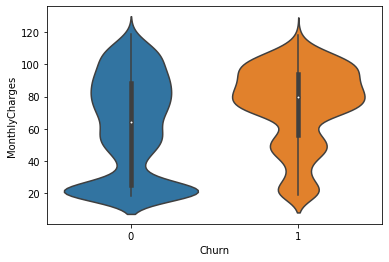

In [29]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=customer_churn);

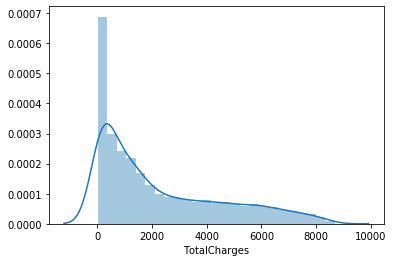

In [30]:
sns.distplot(customer_churn.TotalCharges);

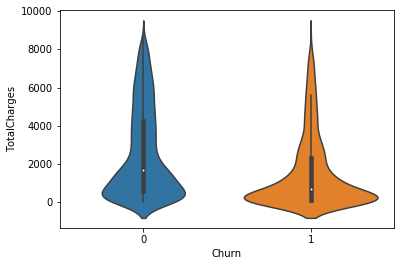

In [31]:
sns.violinplot(x="Churn", y="TotalCharges", data=customer_churn);

In [32]:
customer_churn.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [33]:
customer_churn['Churn'] = customer_churn['Churn'].astype(int)

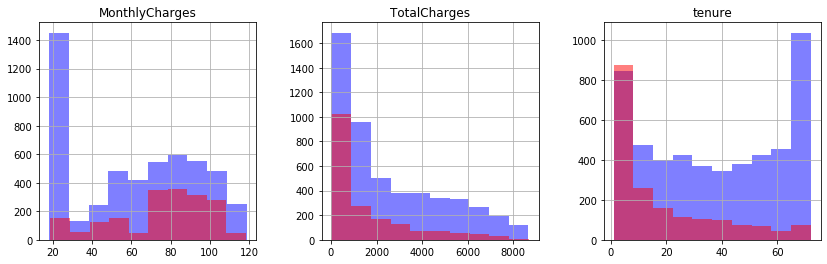

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
customer_churn[customer_churn.Churn == 0][["tenure", "MonthlyCharges", "TotalCharges"]].hist(color="blue", alpha=0.5, ax=ax)
customer_churn[customer_churn.Churn == 1][["tenure", "MonthlyCharges", "TotalCharges"]].hist(color="red", alpha=0.5, ax=ax)
plt.show()

# Key Insights

Males and Females are equally distributed for churn and non churn customers.

Majority of customers do not fall in seniority age group. We can see that proportion of senior customers churning is higher as compared to non churn senior customers.

If the customer has a partner then there is a less chance of him/her to churn while the customers without any partners tend to churn more frequently.

If the customer has any dependents then the chances of him/her churning reduces by 50%.

Customers with fibre optics internet service then there is high chance that they might churn, so we might need to further investigate this feature.

Month-to-Month based contractors tend to churn more when compared to the one-year and two-year contractors.

If the customer is opting for paperless billing then the chances of him/her churning are double.

Customers paying by electronic payment methods tend to churn significantly more than the customers using mailed check,
bank transfer or credit card.

Therefore, there are chances that churn customers are not happy with paperless billing and electronic check payment services or customers using them tend to be change their telecom service provider more often than others.

Customers who have spent higher tenure with the company are less likely to churn while the customers with a tenure of less than
24 months are more likely to churn.

Customers with  monthly charges more than 70$ are more likely to churn.

Customers with total charges less than 1000$ are more likely to churn.

Phone service, Multiple lines distribution, Streaming Movies, Streaming TV, Device Protection, Tech support and Online Backup aren't much of a factor to decide whether the customer will churn or not.

# Chi Square Test 

We use Chi Square Test to check the correlation between Categorical Features and Binary Response.

In [35]:
   for x in  [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
    
    print('==========Chi Square Test for ', x ,' and Churn ==========')
    
    contingency_table=pd.crosstab(customer_churn[x],customer_churn["Churn"])

    Observed_Values = contingency_table.values 

    #Expected Values
    import scipy.stats
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)

#Significance Level 5%
    alpha=0.05
    
#chi-square statistic - χ2
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]

#critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)

#p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)


#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    if chi_square_statistic>=critical_value:
        print("Reject Null Hypothesis H0,There is a relationship between 2 categorical variables - Churn and ",x)
    else:
        print("We cannot reject Null Hypothesis H0,There is no relationship between 2 categorical variables - Churn and ",x)
    
    print("\n")

==========Chi Square Test for  Partner  and Churn ==========
Reject Null Hypothesis H0,There is a relationship between 2 categorical variables - Churn and  Partner


==========Chi Square Test for  Dependents  and Churn ==========
Reject Null Hypothesis H0,There is a relationship between 2 categorical variables - Churn and  Dependents


==========Chi Square Test for  PhoneService  and Churn ==========
We cannot reject Null Hypothesis H0,There is no relationship between 2 categorical variables - Churn and  PhoneService


==========Chi Square Test for  MultipleLines  and Churn ==========
Reject Null Hypothesis H0,There is a relationship between 2 categorical variables - Churn and  MultipleLines


==========Chi Square Test for  OnlineSecurity  and Churn ==========
Reject Null Hypothesis H0,There is a relationship between 2 categorical variables - Churn and  OnlineSecurity


==========Chi Square Test for  OnlineBackup  and Churn ==========
Reject Null Hypothesis H0,There is a relationship b

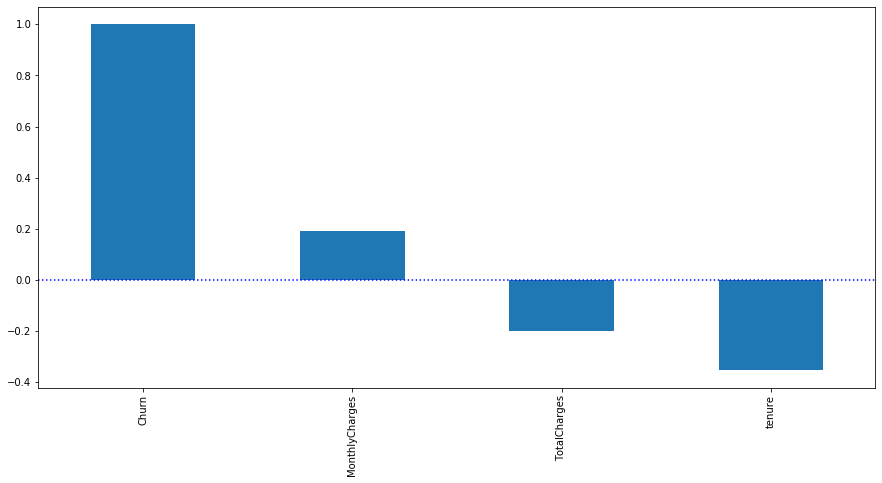

In [36]:
#correlation matrix
fig = plt.figure(figsize = (15,7))
customer_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.axhline(0, color='b', linestyle=':')
plt.show()

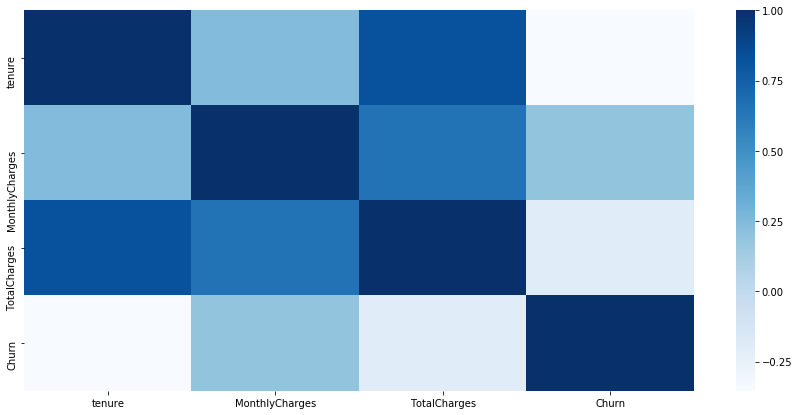

In [37]:
#correlation of all features with each other
corr=customer_churn.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(15,7))
sns.heatmap(corr,annot=False,cmap='Blues')

In [38]:
#dropping customerId since it wont be required in the modeling part
customer_churn.drop("customerID",inplace = True, axis = 1)

# Modeling data as per the model

In [39]:
#using the pandas built-in method get_dummies to give the values and prefix to the categorical fields
dfPaymentDummies = pd.get_dummies(customer_churn['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(customer_churn['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(customer_churn['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(customer_churn['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(customer_churn['InternetService'], prefix = 'IS')

In [40]:
#dropping the categorical columns
customer_churn.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

#merging the columns into the main dataset customer_churn
customer_churn = pd.concat([customer_churn, dfPaymentDummies], axis=1)
customer_churn = pd.concat([customer_churn, dfContractDummies], axis=1)
customer_churn = pd.concat([customer_churn, dfGenderDummies], axis=1)
customer_churn = pd.concat([customer_churn, dfSeniorCitizenDummies], axis=1)
customer_churn = pd.concat([customer_churn, dfInternetServiceDummies], axis=1)
customer_churn.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1,0,0,34,1,0,1,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
2,0,0,2,1,0,1,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0
3,0,0,45,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
4,0,0,2,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [41]:
#renaming all columns in the dataset
customer_churn.columns = ['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [42]:
#converting all columns into numeric datatype
numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    customer_churn[columnName]=pd.to_numeric(customer_churn[columnName],errors='coerce')
customer_churn.dtypes

Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int32
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True                         uint8
IS_DSL      

In [43]:
#save the model to disk
customer_churn.to_csv('churn_model_data.csv')

# Evaluating Models

In [44]:
#splitting dataset into train and test(70:30)
from sklearn.model_selection import train_test_split
X = customer_churn.loc[:, customer_churn.columns != 'Churn']
y = customer_churn.loc[:, customer_churn.columns == 'Churn']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7032, 28)
Shape of y: (7032, 1)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4922, 28)
Number transactions y_train dataset:  (4922, 1)
Number transactions X_test dataset:  (2110, 28)
Number transactions y_test dataset:  (2110, 1)


In [46]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [47]:
#writing a function to apply a classifier model to the training and testing data
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    
    #Training Accuracy
    acc_train = round(clf.score(xTrain, yTrain)*100, 2)
    print("Training Accuracy is ", acc_train)

    #Testing Accuracy
    acc_test = round(accuracy_score(yTest,predictions)*100, 2)
    print("Testing Accuracy is ", acc_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1555
           1       0.47      0.46      0.46       555

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110

Area under ROC curve :  0.6370614987978332 

Training Accuracy is  99.84
Testing Accuracy is  72.04


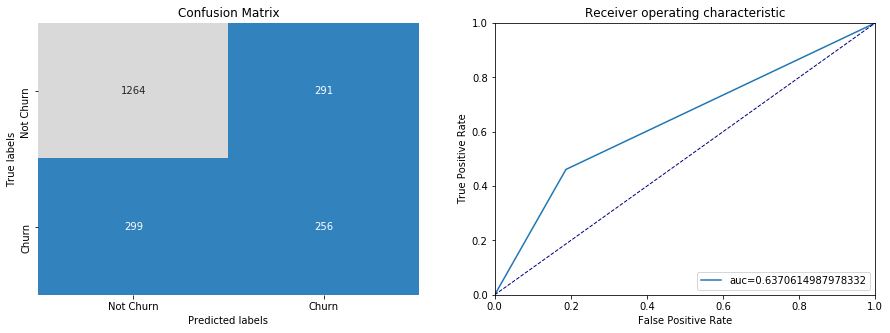

In [49]:
#Decision tree
decision_tree = DecisionTreeClassifier(random_state = 100);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.52      0.57       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7076272413892993 

Training Accuracy is  80.64
Testing Accuracy is  79.62


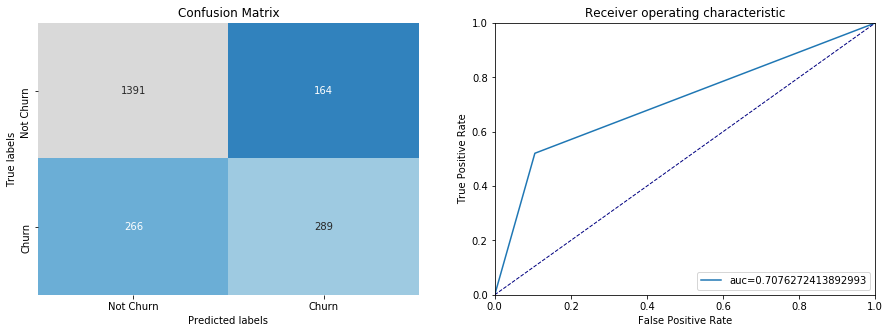

In [50]:
#Logistic Regression
logistic_reg = LogisticRegression(random_state = 100)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86      1555
           1       0.66      0.25      0.37       555

    accuracy                           0.77      2110
   macro avg       0.72      0.60      0.61      2110
weighted avg       0.75      0.77      0.73      2110

Area under ROC curve :  0.6032328148083775 

Training Accuracy is  93.03
Testing Accuracy is  76.87


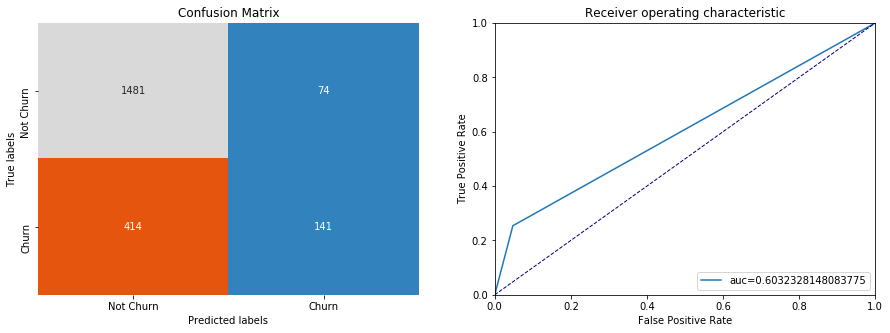

In [51]:
#Support Vector Machine
svm_model = SVC(random_state = 100)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1555
           1       0.58      0.42      0.48       555

    accuracy                           0.77      2110
   macro avg       0.70      0.65      0.67      2110
weighted avg       0.75      0.77      0.75      2110

Area under ROC curve :  0.6544103589119667 

Training Accuracy is  97.81
Testing Accuracy is  76.73


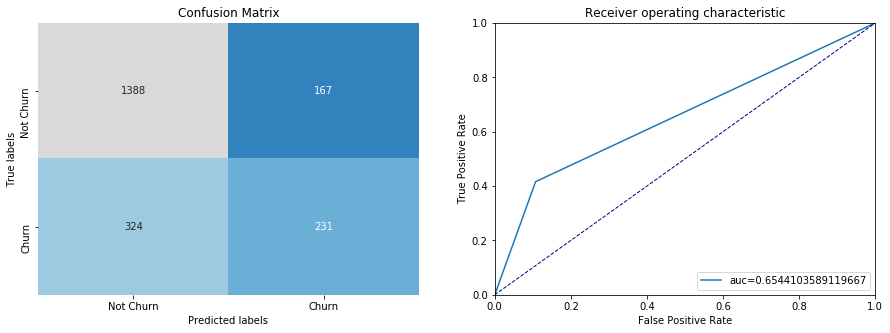

In [52]:
#Random forest algorithm
random_forest = RandomForestClassifier(random_state = 100)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)